# <strong> Import libraries</strong>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import json
import seaborn as sns

# <strong> Read data</strong>

In [58]:
covid_df = pd.read_csv('../data/final_data.csv')
covid_df.head()

,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,1 Caseevery X ppl,lat,lon
0,Afghanistan,2023-03-02,209359,19,7896.0,0.0,191166.0,10,10297.0,45,1201475.0,40754388,Asia,195,33.768006,66.238514
1,Afghanistan,2023-03-03,209362,3,7896.0,0.0,191170.0,4,10296.0,45,1201744.0,40754388,Asia,195,33.768006,66.238514
2,Afghanistan,2023-03-04,209370,4,7896.0,0.0,191181.0,7,10293.0,45,1202018.0,40754388,Asia,195,33.768006,66.238514
3,Afghanistan,2023-03-05,209390,20,7896.0,0.0,191212.0,31,10282.0,45,1202290.0,40754388,Asia,195,33.768006,66.238514
4,Afghanistan,2023-03-06,209394,24,7896.0,0.0,191233.0,52,10265.0,45,1202290.0,40754388,Asia,195,33.768006,66.238514


# <strong> Analytics for data visualization</strong>
### **Question 8: Draw graph showing the number of new cases of all countries in 6 continents in 1 week?**
There are many steps to answer this question:
- Group by continent and day, then calculate the total number of new cases per day
- Draw a graph of 6 lines each corresponding to each continent then comment

#### **Step 1. Group by continent and day, then calculate the total number of new cases per day.**

In [59]:
covid_df = covid_df.loc[(covid_df['Date'] >= '2023-03-03') & (covid_df['Date'] <= '2023-03-10')]
covid_df.head(10)

,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,1 Caseevery X ppl,lat,lon
1,Afghanistan,2023-03-03,209362,3,7896.0,0.0,191170.0,4,10296.0,45,1201744.0,40754388,Asia,195,33.768006,66.238514
2,Afghanistan,2023-03-04,209370,4,7896.0,0.0,191181.0,7,10293.0,45,1202018.0,40754388,Asia,195,33.768006,66.238514
3,Afghanistan,2023-03-05,209390,20,7896.0,0.0,191212.0,31,10282.0,45,1202290.0,40754388,Asia,195,33.768006,66.238514
4,Afghanistan,2023-03-06,209394,24,7896.0,0.0,191233.0,52,10265.0,45,1202290.0,40754388,Asia,195,33.768006,66.238514
5,Afghanistan,2023-03-07,209415,21,7896.0,0.0,191243.0,10,10276.0,45,1202868.0,40754388,Asia,195,33.768006,66.238514
6,Afghanistan,2023-03-08,209441,26,7896.0,0.0,191262.0,19,10283.0,45,1203414.0,40754388,Asia,195,33.768006,66.238514
7,Afghanistan,2023-03-09,209451,10,7896.0,0.0,191272.0,10,10283.0,45,1203807.0,40754388,Asia,195,33.768006,66.238514
8,Afghanistan,2023-03-10,209484,2,7896.0,0.0,191284.0,4,10304.0,45,1204573.0,40754388,Asia,195,33.768006,66.238514
10,Albania,2023-03-03,334427,19,3597.0,1.0,329169.0,17,1661.0,0,1941032.0,2866374,Europe,9,41.000028,19.999962
11,Albania,2023-03-04,334427,0,3597.0,0.0,329169.0,0,1661.0,0,1941032.0,2866374,Europe,9,41.000028,19.999962


In [60]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'])

continent_weekly = covid_df.groupby(['Continent', 'Date']).sum().reset_index()
continent_weekly.head(10)

,Continent,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,lat,lon
0,Africa,2023-03-03,12136367,525,256657.0,0.0,11526508.0,85,353202.0,515,1.104832e+08,1403099946,155.189350,866.663450
1,Africa,2023-03-04,12136445,78,256657.0,0.0,11526625.0,117,353163.0,515,1.104857e+08,1403099946,155.189350,866.663450
2,Africa,2023-03-05,12136612,167,256660.0,3.0,11526792.0,167,353160.0,515,1.104950e+08,1403099946,155.189350,866.663450
3,Africa,2023-03-06,12136612,167,256660.0,3.0,11526792.0,167,353160.0,515,1.104950e+08,1403099946,155.189350,866.663450
4,Africa,2023-03-07,12137615,1003,256660.0,0.0,11526869.0,77,354086.0,515,1.104969e+08,1403099946,155.189350,866.663450
5,Africa,2023-03-08,12138218,603,256670.0,10.0,11526972.0,106,354576.0,515,1.105006e+08,1403099946,155.189350,866.663450
6,Africa,2023-03-09,12139210,992,256677.0,7.0,11527401.0,433,355132.0,515,1.105021e+08,1403099946,155.189350,866.663450
7,Africa,2023-03-10,12140139,478,256677.0,0.0,11527481.0,55,355981.0,515,1.105088e+08,1403099946,155.189350,866.663450
8,Asia,2023-03-03,213908826,38724,1536466.0,190.0,198582950.0,29603,13789410.0,9141,2.373281e+09,4708914936,1229.017049,3378.872733
9,Asia,2023-03-04,213944184,35043,1536653.0,184.0,198636650.0,53556,13770881.0,9143,2.373649e+09,4708914936,1229.017049,3378.872733


In [61]:
#get continent, date, new cases columns
continent_weekly = continent_weekly[['Continent', 'Date', 'NewCases']]
continent_weekly.head(200)

,Continent,Date,NewCases
0,Africa,2023-03-03,525
1,Africa,2023-03-04,78
2,Africa,2023-03-05,167
3,Africa,2023-03-06,167
4,Africa,2023-03-07,1003
5,Africa,2023-03-08,603
6,Africa,2023-03-09,992
7,Africa,2023-03-10,478
8,Asia,2023-03-03,38724
9,Asia,2023-03-04,35043


#### **Step 2. Draw a graph of 6 lines each corresponding to each continent then comment.**

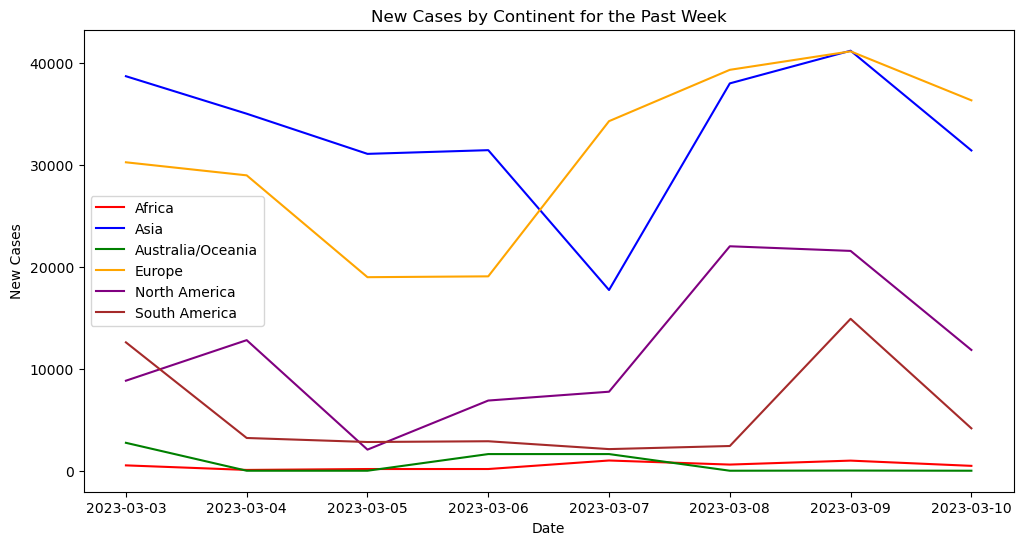

In [62]:
# Creating figures and axes
fig, ax = plt.subplots(figsize=(12,6))

# Create a list containing information about the respective continents and colors
continents = ['Africa', 'Asia', 'Australia/Oceania', 'Europe', 'North America', 'South America']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

# Loop through each continent and draw a line plot
for i, continent in enumerate(continents):
    # Filter out records with corresponding continent
    continent_data = continent_weekly.loc[continent_weekly['Continent'] == continent]
    # Create line plots with corresponding colors
    ax.plot(continent_data['Date'], continent_data['NewCases'], label=continent, color=colors[i])

# Add title, x-label, y-label, and legend
ax.set_title('New Cases by Continent for the Past Week')
ax.set_xlabel('Date')
ax.set_ylabel('New Cases')
ax.legend()

plt.show()

&#9889; <font color="yellow">**Comment on the results.**</font>
- We see that the total number of new cases in 7 consecutive days fluctuates, of which 2 continents, Europe and Asia, have the highest number of new cases, while Africa and Australia have the lowest number of new cases. The Americas have the second highest number of new cases, but the number of new cases in the Americas is not as high as Europe and Asia.
- As new cases are concentrated only in Asia and Europe, disease control needs to be done more thoroughly in the process of living with the epidemic today.
- Although the number of cases is no longer increasing as fast as the days of the outbreak, but so it is subjective. More care needs to be taken in disease control.